In [1]:
import os
import pickle 
import pandas as pd
import jieba
from zhon.hanzi import punctuation
import re
import googletrans
from pprint import pprint
import matplotlib.pyplot as plt 
from datetime import datetime

import warnings
warnings.filterwarnings("ignore")

## 1. 載入Corpus

In [2]:
path = 'C:/Users/USER/Desktop/Prof_Hsieh_Project/PTT/PTT_Corpus_Data'
os.chdir(path)

data = pd.read_pickle('Finance-1-1332.pkl')
data_extract = data[['content', 'date']]
data_extract['content'] = data_extract['content'].astype(str)
data_extract.head()

,content,date
0,Finance 板申請開板連署通過，即日起開板試閱 試閱期間三個月，期滿後將再評估是否轉為正...,Mon Aug 11 21:13:51 2008
1,賀finance開板 祝此板以後大有可為 大家都可以分享自己的心得 然後在這邊能得到自己想知...,Mon Aug 11 21:48:50 2008
2,剛剛不知道是不是眼殘...在分類還找不到路進來 = = 最後是按s 打看版名才進來的 希望人...,Mon Aug 11 22:25:32 2008
3,身為金融業的一份子一定要進來恭喜的 好開心有自己的地方可以討論...XD 希望人氣越來越高呀,Mon Aug 11 22:26:32 2008
4,請大家po文自介一下吧 感謝大家,Mon Aug 11 22:50:28 2008


### preprocess

In [3]:
def preprocess(text):
    """
    remove punctuations, numbers, english letters, line break and blank.
    """
    for i in punctuation:
        text = text.replace(i, '')
    text = re.sub('[\d]','',text) # [0-9]
    
    text = re.sub(r'[.,"\'-?:!;]', '', text)
    
    text = re.sub('[a-zA-Z]','', text)
    
    text = text.replace("\n", "")
    text = text.replace(" ", "")
    return text

def tokenization(text): # 斷詞
    seg_list = jieba.cut(text, cut_all=False)
    return list(seg_list)

In [4]:
data_extract['prepreocessed'] = data_extract['content'].map(preprocess)
data_extract['tokens'] = data_extract['prepreocessed'].map(tokenization)

del data_extract['prepreocessed']

Building prefix dict from the default dictionary ...
Dumping model to file cache C:\Users\USER\AppData\Local\Temp\jieba.cache
Loading model cost 0.799 seconds.
Prefix dict has been built successfully.


In [5]:
data_extract

,content,date,tokens
0,Finance 板申請開板連署通過，即日起開板試閱 試閱期間三個月，期滿後將再評估是否轉為正...,Mon Aug 11 21:13:51 2008,"[板, 申請, 開板, 連署, 通過, 即日起, 開板試, 閱試, 閱期間, 三個, 月期,..."
1,賀finance開板 祝此板以後大有可為 大家都可以分享自己的心得 然後在這邊能得到自己想知...,Mon Aug 11 21:48:50 2008,"[賀開板, 祝, 此板, 以後大有, 可為, 大家, 都, 可以, 分享, 自己, 的, 心..."
2,剛剛不知道是不是眼殘...在分類還找不到路進來 = = 最後是按s 打看版名才進來的 希望人...,Mon Aug 11 22:25:32 2008,"[剛剛, 不, 知道, 是不是, 眼殘, 在, 分類, 還找, 不到, 路, 進來, 最後是..."
3,身為金融業的一份子一定要進來恭喜的 好開心有自己的地方可以討論...XD 希望人氣越來越高呀,Mon Aug 11 22:26:32 2008,"[身為, 金融, 業的, 一份, 子, 一定, 要, 進來, 恭喜, 的, 好, 開心, 有..."
4,請大家po文自介一下吧 感謝大家,Mon Aug 11 22:50:28 2008,"[請, 大家, 文自介, 一下, 吧, 感謝, 大家]"
...,...,...,...
26509,大家好我是國立臺灣大學心理學研究所工商組碩班研究生。 目前正在進行碩士論文研究，正在招募論文...,Sun Aug 7 22:22:07 2022,"[大家, 好, 我, 是, 國立, 臺, 灣大學, 心理, 學, 研究所, 工商, 組碩班,..."
26510,大家好 今天台銀筆試放榜 我是考中彰投區的催收，成績有通過面試門檻 想請問在準備面試或是自傳...,Mon Aug 8 21:45:20 2022,"[大家, 好, 今天, 台銀, 筆試, 放榜, 我, 是, 考中彰, 投區, 的, 催收, ..."
26511,開放此篇推文交流 推文請詳盡告知條件 必注意對方是否可靠，此類事件若產生糾紛一概不受理申訴,Thu May 13 20:21:32 2010,"[開放此, 篇, 推文, 交流, 推文請, 詳盡, 告知, 條件, 必, 注意, 對方, 是..."
26512,格式： 此後買賣文除非連續狂po者我會水桶po文者之外 我會直接刪除不另行公告 bonjou...,Mon Jul 5 23:43:55 2010,"[格式, 此後買, 賣文, 除非, 連續, 狂者, 我會, 水桶, 文者, 之外, 我會, ..."


## 2. 載入翻譯word 

In [7]:
name = "C:/Users/USER/Desktop/Prof_Hsieh_Project/about_emotion/Chinese_derivative/NTUSD_Fin_sentiment.json"
df_score = pd.read_json(name, encoding="utf-8")
# df_score = df[['token', 'market_sentiment']]
df_score

,token,market_sentiment
0,筆記,1.081211
1,機械手,1.221692
2,吸,-1.507409
3,車庫,1.069689
4,艾滋病,0.922132
...,...,...
8441,☕,1.141662
8442,😀,-0.644559
8443,👍,1.100400
8444,👆,1.059200


In [8]:
def Average(lst):
    return sum(lst) / len(lst)

sentiment_tokens = list(df_score['token'])
def sa_print(tokens):
    score = 0
    count = 0
    for i in tokens:
        if i in a:
            tmp = list(df_score[df_score['token'] == i]['market_sentiment'])
            print(i, tmp)
            avg = Average(tmp)
            count += 1
            score += avg

    if(count == 0): return 0
    else: return score/count

def sa(tokens):
    score = 0
    count = 0
    for i in tokens:
        if i in a:
            tmp = list(df_score[df_score['token'] == i]['market_sentiment'])
            avg = Average(tmp)
            count += 1
            score += avg

    if(count == 0): return 0
    else: return score/count

In [10]:
sentiment_tokens[:100]

['筆記',
 '機械手',
 '吸',
 '車庫',
 '艾滋病',
 '放',
 '睡覺',
 '便士',
 '證明',
 '三倍',
 '是的',
 '設計的',
 '倡議',
 '不斷地',
 '溫暖的',
 '癮',
 '開始',
 '思科',
 '再融資',
 '升起',
 '基準',
 '三倍',
 '清單',
 '多',
 '轉變',
 '合法的',
 '長',
 '基本上',
 '避免',
 '夢想家',
 '化合物',
 '雜草',
 '他媽的',
 '圖標',
 '顱骨',
 '希望',
 '停滯不前',
 '口袋妖怪',
 '印度',
 '否認',
 '隱私',
 '翅膀',
 '得克薩斯州',
 '知識分子',
 '隊友',
 '完成',
 '隱',
 '膠水',
 '跟踪',
 '厄運',
 '衝擊',
 '分鐘',
 '高跟鞋',
 '違反',
 '考慮',
 '腎臟',
 '封頂',
 '比特幣',
 '可交易的',
 '鬼鬼祟祟',
 '通訊',
 '主導的',
 '配料',
 '編輯',
 '墨西哥',
 '灰度',
 '昂貴的',
 '已到期',
 '沃倫',
 '接收',
 '殺戮',
 '聲稱',
 '討論過',
 '明天',
 '有針對性的',
 '遵守',
 '反應',
 '小的',
 '聯繫',
 '提供',
 '保護',
 '雲',
 '遊樂設施',
 '阿西亞',
 '部',
 '上升',
 '發明的',
 '弱點',
 '一樣',
 '除非',
 '雜貨店',
 '颶風',
 '細繩',
 '托運人',
 '每月',
 '絲毫',
 '摩爾',
 '無論如何',
 '上訴',
 '收穫']

### example

In [29]:
data_extract['content'][25]

' ＩＤ： fillion 性別： 男 出沒地帶： 在新店居住在中山區工作在板橋及大直打球的高雄人...= = 學歷： 中正財金所 曾經工作過的職位： 信義房屋 >上海銀行 現職及目前工作內容： 櫃台 工時: 8:45~17:30 優點: 有點閒 缺點: 好像有點太閒 XD 相簿或網誌連結： http://www.wretch.cc/album/fillion 對看板未來走向的意見： 金融真的是相當廣博的學問 在這個工作中除了合理的報酬收入外也學到相當多教科書上學不到的東西 希望能透過這個版交流大家的日常心得 讓這個版的討論風氣可以超越來勝加油 '

In [30]:
data_extract['tokens'][25]

['Ｉ',
 'Ｄ',
 '性別',
 '男出',
 '沒地',
 '帶',
 '在',
 '新店',
 '居住',
 '在',
 '中山',
 '區',
 '工作',
 '在',
 '板橋',
 '及',
 '大直',
 '打球',
 '的',
 '高雄人',
 '學歷',
 '中正',
 '財金',
 '所',
 '曾經',
 '工作',
 '過的',
 '職位',
 '信義',
 '房屋',
 '上海',
 '銀行現',
 '職及',
 '目前',
 '工作',
 '內容',
 '櫃台',
 '工時',
 '~',
 '優點',
 '有點',
 '閒',
 '缺點',
 '好像',
 '有點',
 '太閒',
 '相簿',
 '或',
 '網誌',
 '連結',
 '對',
 '看板',
 '未來',
 '走向',
 '的',
 '意見',
 '金融',
 '真的',
 '是',
 '相當',
 '廣博',
 '的',
 '學問',
 '在',
 '這個',
 '工作',
 '中',
 '除了',
 '合理',
 '的',
 '報酬',
 '收入',
 '外',
 '也',
 '學到',
 '相當',
 '多',
 '教科',
 '書上學',
 '不到',
 '的',
 '東西',
 '希望',
 '能',
 '透過',
 '這個',
 '版',
 '交流',
 '大家',
 '的',
 '日常',
 '心得',
 '讓',
 '這個',
 '版',
 '的',
 '討論',
 '風氣',
 '可以',
 '超越',
 '來勝',
 '加油']

In [31]:
sa_print(data_extract['tokens'][25])

性別 [0.9460577183000001]
在 [0.43143903, 1.1285827566, -1.2528364888999999, 1.0152412835, -0.1322213293, 1.1429150476]
居住 [0.8132527015000001]
在 [0.43143903, 1.1285827566, -1.2528364888999999, 1.0152412835, -0.1322213293, 1.1429150476]
區 [-0.33421660070000003]
工作 [0.0248383679, 0.1554780552, 1.221692161]
在 [0.43143903, 1.1285827566, -1.2528364888999999, 1.0152412835, -0.1322213293, 1.1429150476]
的 [1.1285827566, 0.0068957254, 1.0841886372, 1.0961612789, -1.5309777870999999]
工作 [0.0248383679, 0.1554780552, 1.221692161]
職位 [-0.1657317698]
房屋 [0.971713908]
上海 [1.0101880558]
目前 [0.3311980546, 1.221692161]
工作 [0.0248383679, 0.1554780552, 1.221692161]
內容 [-0.1015849949]
優點 [-1.0873711357, 1.1851662849, 0.9806840615]
有點 [1.1270552868000001]
缺點 [-2.1141380452, 0.8997640661]
有點 [1.1270552868000001]
對 [1.143689649, 0.2544776533]
未來 [-0.0738439958, 0.4981056032]
的 [1.1285827566, 0.0068957254, 1.0841886372, 1.0961612789, -1.5309777870999999]
意見 [0.2845976417]
金融 [-0.699349953, 0.3361279424, -0.69456

0.5176580632974214

## 3. 使用function

In [32]:
data_extract['score'] = data_extract['tokens'].map(sa)

In [33]:
data_extract.head()

,content,date,tokens,score
0,Finance 板申請開板連署通過，即日起開板試閱 試閱期間三個月，期滿後將再評估是否轉為正...,Mon Aug 11 21:13:51 2008,"[板, 申請, 開板, 連署, 通過, 即日起, 開板試, 閱試, 閱期間, 三個, 月期,...",0.515474
1,賀finance開板 祝此板以後大有可為 大家都可以分享自己的心得 然後在這邊能得到自己想知...,Mon Aug 11 21:48:50 2008,"[賀開板, 祝, 此板, 以後大有, 可為, 大家, 都, 可以, 分享, 自己, 的, 心...",0.468254
2,剛剛不知道是不是眼殘...在分類還找不到路進來 = = 最後是按s 打看版名才進來的 希望人...,Mon Aug 11 22:25:32 2008,"[剛剛, 不, 知道, 是不是, 眼殘, 在, 分類, 還找, 不到, 路, 進來, 最後是...",0.211866
3,身為金融業的一份子一定要進來恭喜的 好開心有自己的地方可以討論...XD 希望人氣越來越高呀,Mon Aug 11 22:26:32 2008,"[身為, 金融, 業的, 一份, 子, 一定, 要, 進來, 恭喜, 的, 好, 開心, 有...",0.405875
4,請大家po文自介一下吧 感謝大家,Mon Aug 11 22:50:28 2008,"[請, 大家, 文自介, 一下, 吧, 感謝, 大家]",0.919559


In [34]:
data_extract.shape

(26514, 4)

In [38]:
# Process date
data_prim = data_extract.copy()
data_prim['prim_date'] = data_prim.date.str[4:]
print(data_prim.shape)
data_prim.head(3)

(26514, 5)


,content,date,tokens,score,prim_date
0,Finance 板申請開板連署通過，即日起開板試閱 試閱期間三個月，期滿後將再評估是否轉為正...,Mon Aug 11 21:13:51 2008,"[板, 申請, 開板, 連署, 通過, 即日起, 開板試, 閱試, 閱期間, 三個, 月期,...",0.515474,Aug 11 21:13:51 2008
1,賀finance開板 祝此板以後大有可為 大家都可以分享自己的心得 然後在這邊能得到自己想知...,Mon Aug 11 21:48:50 2008,"[賀開板, 祝, 此板, 以後大有, 可為, 大家, 都, 可以, 分享, 自己, 的, 心...",0.468254,Aug 11 21:48:50 2008
2,剛剛不知道是不是眼殘...在分類還找不到路進來 = = 最後是按s 打看版名才進來的 希望人...,Mon Aug 11 22:25:32 2008,"[剛剛, 不, 知道, 是不是, 眼殘, 在, 分類, 還找, 不到, 路, 進來, 最後是...",0.211866,Aug 11 22:25:32 2008


In [ ]:
data_prim['datetime'] = ''
sz = len(data_prim['prim_date'])
for i in range(sz):
    try:
        data_prim['datetime'][i] = datetime.strptime(data_prim['prim_date'][i],"%b %d %H:%M:%S %Y")
    except:
        data_prim['datetime'][i] = 0

In [61]:
data_prim.head()

,content,date,tokens,score,prim_date,datetime
0,Finance 板申請開板連署通過，即日起開板試閱 試閱期間三個月，期滿後將再評估是否轉為正...,Mon Aug 11 21:13:51 2008,"[板, 申請, 開板, 連署, 通過, 即日起, 開板試, 閱試, 閱期間, 三個, 月期,...",0.515474,Aug 11 21:13:51 2008,2008-08-11 21:13:51
1,賀finance開板 祝此板以後大有可為 大家都可以分享自己的心得 然後在這邊能得到自己想知...,Mon Aug 11 21:48:50 2008,"[賀開板, 祝, 此板, 以後大有, 可為, 大家, 都, 可以, 分享, 自己, 的, 心...",0.468254,Aug 11 21:48:50 2008,2008-08-11 21:48:50
2,剛剛不知道是不是眼殘...在分類還找不到路進來 = = 最後是按s 打看版名才進來的 希望人...,Mon Aug 11 22:25:32 2008,"[剛剛, 不, 知道, 是不是, 眼殘, 在, 分類, 還找, 不到, 路, 進來, 最後是...",0.211866,Aug 11 22:25:32 2008,2008-08-11 22:25:32
3,身為金融業的一份子一定要進來恭喜的 好開心有自己的地方可以討論...XD 希望人氣越來越高呀,Mon Aug 11 22:26:32 2008,"[身為, 金融, 業的, 一份, 子, 一定, 要, 進來, 恭喜, 的, 好, 開心, 有...",0.405875,Aug 11 22:26:32 2008,2008-08-11 22:26:32
4,請大家po文自介一下吧 感謝大家,Mon Aug 11 22:50:28 2008,"[請, 大家, 文自介, 一下, 吧, 感謝, 大家]",0.919559,Aug 11 22:50:28 2008,2008-08-11 22:50:28


In [85]:
clean_data = data_prim.drop(columns=['prim_date','date'])
clean_data.shape

(26514, 4)

In [86]:
type(clean_data['datetime'][0])
drop_list = []

for i in range(sz): 
    if (type(clean_data['datetime'][i])!=datetime):
        drop_list.append(i)

In [87]:
clean_data.drop(drop_list, axis=0, inplace=True)
clean_data = clean_data.reset_index(drop=True)
clean_data.shape

(26254, 4)

In [88]:
clean_data

,content,tokens,score,datetime
0,Finance 板申請開板連署通過，即日起開板試閱 試閱期間三個月，期滿後將再評估是否轉為正...,"[板, 申請, 開板, 連署, 通過, 即日起, 開板試, 閱試, 閱期間, 三個, 月期,...",0.515474,2008-08-11 21:13:51
1,賀finance開板 祝此板以後大有可為 大家都可以分享自己的心得 然後在這邊能得到自己想知...,"[賀開板, 祝, 此板, 以後大有, 可為, 大家, 都, 可以, 分享, 自己, 的, 心...",0.468254,2008-08-11 21:48:50
2,剛剛不知道是不是眼殘...在分類還找不到路進來 = = 最後是按s 打看版名才進來的 希望人...,"[剛剛, 不, 知道, 是不是, 眼殘, 在, 分類, 還找, 不到, 路, 進來, 最後是...",0.211866,2008-08-11 22:25:32
3,身為金融業的一份子一定要進來恭喜的 好開心有自己的地方可以討論...XD 希望人氣越來越高呀,"[身為, 金融, 業的, 一份, 子, 一定, 要, 進來, 恭喜, 的, 好, 開心, 有...",0.405875,2008-08-11 22:26:32
4,請大家po文自介一下吧 感謝大家,"[請, 大家, 文自介, 一下, 吧, 感謝, 大家]",0.919559,2008-08-11 22:50:28
...,...,...,...,...
26249,大家好我是國立臺灣大學心理學研究所工商組碩班研究生。 目前正在進行碩士論文研究，正在招募論文...,"[大家, 好, 我, 是, 國立, 臺, 灣大學, 心理, 學, 研究所, 工商, 組碩班,...",0.541786,2022-08-07 22:22:07
26250,大家好 今天台銀筆試放榜 我是考中彰投區的催收，成績有通過面試門檻 想請問在準備面試或是自傳...,"[大家, 好, 今天, 台銀, 筆試, 放榜, 我, 是, 考中彰, 投區, 的, 催收, ...",0.607724,2022-08-08 21:45:20
26251,開放此篇推文交流 推文請詳盡告知條件 必注意對方是否可靠，此類事件若產生糾紛一概不受理申訴,"[開放此, 篇, 推文, 交流, 推文請, 詳盡, 告知, 條件, 必, 注意, 對方, 是...",0.509816,2010-05-13 20:21:32
26252,格式： 此後買賣文除非連續狂po者我會水桶po文者之外 我會直接刪除不另行公告 bonjou...,"[格式, 此後買, 賣文, 除非, 連續, 狂者, 我會, 水桶, 文者, 之外, 我會, ...",0.179657,2010-07-05 23:43:55


# Aggregate

In [89]:
oldest = min(clean_data['datetime'])
newest = max(clean_data['datetime'])
print(oldest)
print(newest)

2008-08-11 21:13:51
2022-08-08 21:45:20


In [91]:
agg_data = clean_data.copy()
agg_data['date_prune'] = agg_data.apply(lambda x: datetime.strftime(x['datetime'], "%Y-%m-%d"),axis=1)
del agg_data['datetime'] 
agg_data.head()

,content,tokens,score,date_prune
0,Finance 板申請開板連署通過，即日起開板試閱 試閱期間三個月，期滿後將再評估是否轉為正...,"[板, 申請, 開板, 連署, 通過, 即日起, 開板試, 閱試, 閱期間, 三個, 月期,...",0.515474,2008-08-11
1,賀finance開板 祝此板以後大有可為 大家都可以分享自己的心得 然後在這邊能得到自己想知...,"[賀開板, 祝, 此板, 以後大有, 可為, 大家, 都, 可以, 分享, 自己, 的, 心...",0.468254,2008-08-11
2,剛剛不知道是不是眼殘...在分類還找不到路進來 = = 最後是按s 打看版名才進來的 希望人...,"[剛剛, 不, 知道, 是不是, 眼殘, 在, 分類, 還找, 不到, 路, 進來, 最後是...",0.211866,2008-08-11
3,身為金融業的一份子一定要進來恭喜的 好開心有自己的地方可以討論...XD 希望人氣越來越高呀,"[身為, 金融, 業的, 一份, 子, 一定, 要, 進來, 恭喜, 的, 好, 開心, 有...",0.405875,2008-08-11
4,請大家po文自介一下吧 感謝大家,"[請, 大家, 文自介, 一下, 吧, 感謝, 大家]",0.919559,2008-08-11


In [92]:
sector = agg_data.groupby("date_prune")
sector.size()

date_prune
2008-08-11    17
2008-08-12    54
2008-08-13    13
2008-08-14     5
2008-08-15     4
              ..
2022-08-02     1
2022-08-05     3
2022-08-06     1
2022-08-07     3
2022-08-08     1
Length: 4917, dtype: int64

In [128]:
condense_df = agg_data.drop(columns=['content', 'tokens'])
condense_df = condense_df.groupby("date_prune").agg({'score':'mean'})
condense_df['date'] = condense_df.index
condense_df = condense_df.reset_index(drop=True)
condense_df['date'] = pd.to_datetime(condense_df["date"])
condense_df.head()

,score,date
0,0.511969,2008-08-11
1,0.554899,2008-08-12
2,0.551233,2008-08-13
3,0.551547,2008-08-14
4,0.566052,2008-08-15


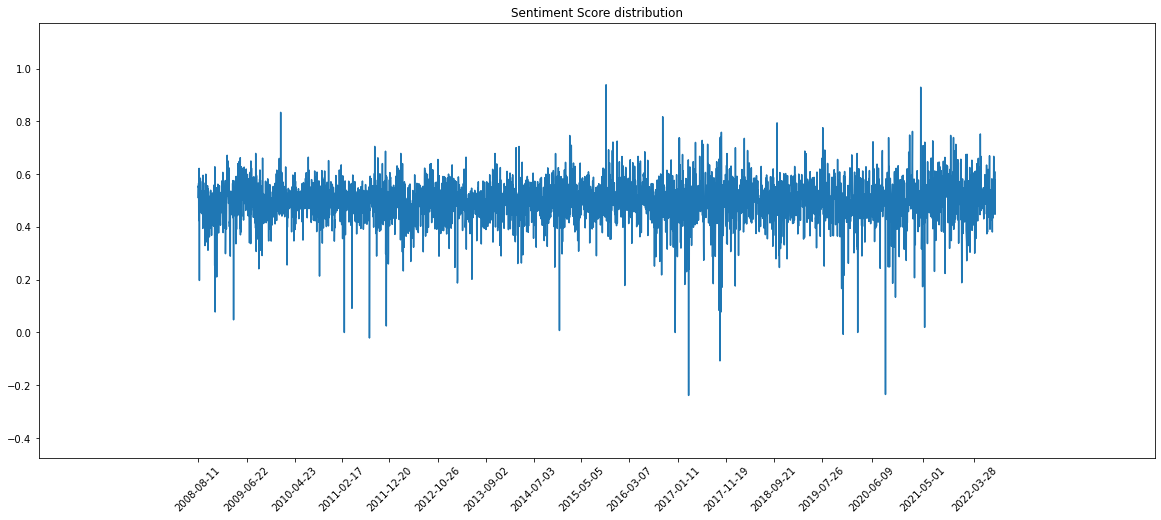

In [131]:
def plot_dense_line_chart(x, y, title): 
    # Risize the figure (optional)    
    plt.figure(figsize=(20,8))

    # Plot the x and y values on the graph
    plt.plot(x, y)

    # Here you specify the ticks you want to display
    # You can also specify rotation for the tick labels in degrees or with keywords.
    plt.xticks(x[::300],  rotation=45)

    # Add margins (padding) so that markers don't get clipped by the axes
    plt.margins(0.2)

    # Display the graph
    plt.title(title)
    plt.show()


plot_dense_line_chart(condense_df['date'], condense_df['score'],"Sentiment Score distribution")

In [133]:
print(condense_df.score.max())
print(condense_df.score.min())

0.9389751771222221
-0.23864294648333334


In [134]:
condense_df

,score,date
0,0.511969,2008-08-11
1,0.554899,2008-08-12
2,0.551233,2008-08-13
3,0.551547,2008-08-14
4,0.566052,2008-08-15
...,...,...
4912,0.513478,2022-08-02
4913,0.479723,2022-08-05
4914,0.578198,2022-08-06
4915,0.448063,2022-08-07


In [135]:
# path = 'C:/Users/USER/Desktop/Prof_Hsieh_Project/about_emotion/Chinese_derivative/Sentiment_Analysis'
# os.chdir(path)

In [136]:
# condense_df.to_csv('NTUSD_Sentiment_Scores.csv', index=False)